# Loan Default Prediction and Evaluation Criteria

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [5]:
df = pd.read_csv('data/Dataset.csv')

/var/folders/1s/22z8y_nn49n_q5dpmnq5vpw00000gn/T/ipykernel_21490/84244152.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Dataset.csv')


## Data Exploration

In [19]:
# Display the summary information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [17]:
# Display the first few rows of the DataFrame
df.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [ ]:
# Displaying summary statistics for all columns, including non-numeric ones
df.describe(include='all')

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118249,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,118224.0,117044,120110,...,121856,121856,118247,53021.000000,116170.000000,94935.0000,59928.000000,118192.000000,103316.000000,121856.000000
unique,NaN,1516,NaN,NaN,NaN,NaN,NaN,6816.0,16680,7,...,2,2,58,NaN,NaN,1430.0000,NaN,NaN,NaN,NaN
top,NaN,13500,NaN,NaN,NaN,NaN,NaN,45000.0,900,Alone,...,Yes,Yes,Business Entity Type 3,NaN,NaN,0.7463,NaN,NaN,NaN,NaN
freq,NaN,11908,NaN,NaN,NaN,NaN,NaN,2513.0,1885,97409,...,112454,100015,26279,NaN,NaN,484.0000,NaN,NaN,NaN,NaN
mean,1.216093e+07,NaN,0.342854,0.332262,0.499175,0.692060,0.417779,NaN,NaN,NaN,...,NaN,NaN,NaN,0.501213,0.518625,NaN,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,NaN,0.474665,0.471026,0.500001,0.461644,0.728802,NaN,NaN,NaN,...,NaN,NaN,NaN,0.211204,0.740248,NaN,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.014568,0.000005,NaN,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.333481,0.390164,NaN,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.504657,0.564978,NaN,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.673890,0.664011,NaN,0.148500,1570.000000,3.000000,0.000000


In [ ]:
# Check for missing values
df.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [20]:
# Checking the shape of the DataFrame
df.shape

(121856, 40)

In [ ]:
# Checking first few rows of the DataFrame
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0
121855,12105610,9000,1.0,1.0,1.0,1.0,1.0,62428.95,4201.65,Alone,...,Yes,Yes,Business Entity Type 3,NaN,0.556414,0.298595,0.1031,805.0,0.0,0


In [22]:
# Checking the last few rows of the DataFrame
df.tail()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0
121855,12105610,9000,1.0,1.0,1.0,1.0,1.0,62428.95,4201.65,Alone,...,Yes,Yes,Business Entity Type 3,NaN,0.556414,0.298595,0.1031,805.0,0.0,0


In [23]:
# Checking the feature names in the DataFrame
df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [24]:
# checking the null values in the DataFrame
df.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [26]:
# checking the data types of each column
df.dtypes

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [30]:
# Checking unique values in each column
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

ID: 121856
Client_Income: 1516
Car_Owned: 2
Bike_Owned: 2
Active_Loan: 2
House_Own: 2
Child_Count: 14
Credit_Amount: 6816
Loan_Annuity: 16680
Accompany_Client: 7
Client_Income_Type: 8
Client_Education: 5
Client_Marital_Status: 4
Client_Gender: 3
Loan_Contract_Type: 2
Client_Housing_Type: 6
Population_Region_Relative: 164
Age_Days: 22583
Employed_Days: 13220
Registration_Days: 19254
ID_Days: 9655
Own_House_Age: 55
Mobile_Tag: 2
Homephone_Tag: 2
Workphone_Working: 2
Client_Occupation: 18
Client_Family_Members: 15
Cleint_City_Rating: 3
Application_Process_Day: 7
Application_Process_Hour: 24
Client_Permanent_Match_Tag: 2
Client_Contact_Work_Tag: 2
Type_Organization: 58
Score_Source_1: 43968
Score_Source_2: 67016
Score_Source_3: 1430
Social_Circle_Default: 1882
Phone_Change: 3590
Credit_Bureau: 21
Default: 2


In [31]:
# checking unique values in each column
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

ID: [12142509 12138936 12181264 ... 12103937 12170623 12105610]
Client_Income: ['6750' '20250' '18000' ... '13140' '9764.1' '12840.75']
Car_Owned: [ 0.  1. nan]
Bike_Owned: [ 0.  1. nan]
Active_Loan: [ 1.  0. nan]
House_Own: [ 0. nan  1.]
Child_Count: [ 0.  1.  2. nan  3.  4.  5.  7.  8. 10.  6. 19. 12. 14.  9.]
Credit_Amount: ['61190.55' '15282' '59527.35' ... '89138.7' '88885.8' '135534.6']
Loan_Annuity: ['3416.85' '1826.55' '2788.2' ... 1736.55 3388.05 2989.35]
Accompany_Client: ['Alone' 'Relative' 'Others' 'Kids' nan 'Partner' '##' 'Group']
Client_Income_Type: ['Commercial' 'Service' 'Retired' 'Govt Job' nan 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']
Client_Education: ['Secondary' 'Graduation' 'Graduation dropout' nan 'Junior secondary'
 'Post Grad']
Client_Marital_Status: ['M' 'W' 'S' nan 'D']
Client_Gender: ['Male' 'Female' nan 'XNA']
Loan_Contract_Type: ['CL' 'RL' nan]
Client_Housing_Type: ['Home' 'Family' 'Office' 'Municipal' nan 'Rental' 'Shared']
Population_Regi

In [32]:
# Merging all functions in the single temp Dataframe
temp = pd.DataFrame(index=df.columns)
temp['null_values'] = df.isnull().sum()
temp['unique_values'] = df.nunique()
temp['data_types'] = df.dtypes
temp

,null_values,unique_values,data_types
ID,0,121856,int64
Client_Income,3607,1516,object
Car_Owned,3581,2,float64
Bike_Owned,3624,2,float64
Active_Loan,3635,2,float64
House_Own,3661,2,float64
Child_Count,3638,14,float64
Credit_Amount,3632,6816,object
Loan_Annuity,4812,16680,object
Accompany_Client,1746,7,object


In [ ]:
# Column wise unique values
for col, unique_values in df.nunique().items():
    if unique_values < 15:
        print(f"'{col}' has {unique_values} unique values: {df[col].unique()}")


'Car_Owned' has 2 unique values: [ 0.  1. nan]
'Bike_Owned' has 2 unique values: [ 0.  1. nan]
'Active_Loan' has 2 unique values: [ 1.  0. nan]
'House_Own' has 2 unique values: [ 0. nan  1.]
'Child_Count' has 14 unique values: [ 0.  1.  2. nan  3.  4.  5.  7.  8. 10.  6. 19. 12. 14.  9.]
'Accompany_Client' has 7 unique values: ['Alone' 'Relative' 'Others' 'Kids' nan 'Partner' '##' 'Group']
'Client_Income_Type' has 8 unique values: ['Commercial' 'Service' 'Retired' 'Govt Job' nan 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']
'Client_Education' has 5 unique values: ['Secondary' 'Graduation' 'Graduation dropout' nan 'Junior secondary'
 'Post Grad']
'Client_Marital_Status' has 4 unique values: ['M' 'W' 'S' nan 'D']
'Client_Gender' has 3 unique values: ['Male' 'Female' nan 'XNA']
'Loan_Contract_Type' has 2 unique values: ['CL' 'RL' nan]
'Client_Housing_Type' has 6 unique values: ['Home' 'Family' 'Office' 'Municipal' nan 'Rental' 'Shared']
'Mobile_Tag' has 2 unique values: [1 0]
'

### Unique Value counts

Car_Owned
0.0    77724
1.0    40551
Name: count, dtype: int64


/var/folders/1s/22z8y_nn49n_q5dpmnq5vpw00000gn/T/ipykernel_21490/3244767749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Car_Owned', data=df, palette='viridis')


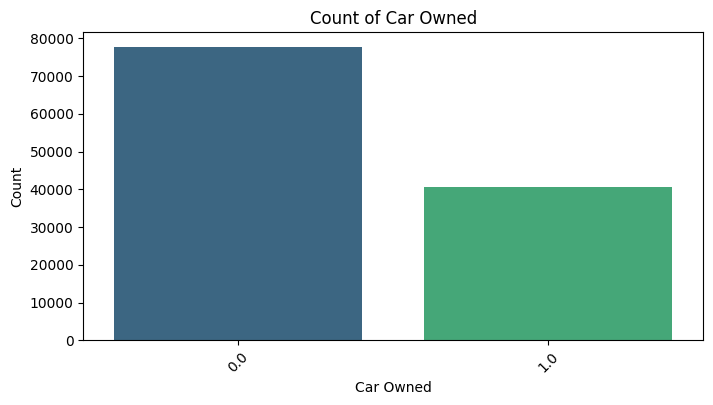

In [63]:
# Car_Owned column analysis
print(df['Car_Owned'].value_counts())

# graphical representation of the 'Car_Owned' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Car_Owned', data=df, palette='viridis')
plt.title('Count of Car Owned')
plt.xlabel('Car Owned')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Bike_Owned
0.0    78948
1.0    39284
Name: count, dtype: int64


/var/folders/1s/22z8y_nn49n_q5dpmnq5vpw00000gn/T/ipykernel_21490/4064324366.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bike_Owned', data=df, palette='viridis')


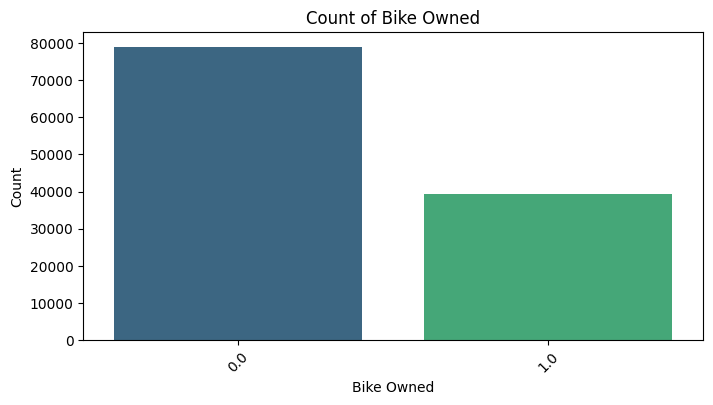

In [64]:
# Bike_Owned column analysis
print(df['Bike_Owned'].value_counts())
# graphical representation of the 'Bike_Owned' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Bike_Owned', data=df, palette='viridis')
plt.title('Count of Bike Owned')
plt.xlabel('Bike Owned')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

House_Own
1.0    81798
0.0    36397
Name: count, dtype: int64


/var/folders/1s/22z8y_nn49n_q5dpmnq5vpw00000gn/T/ipykernel_21490/3727982514.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='House_Own', data=df, palette='viridis')


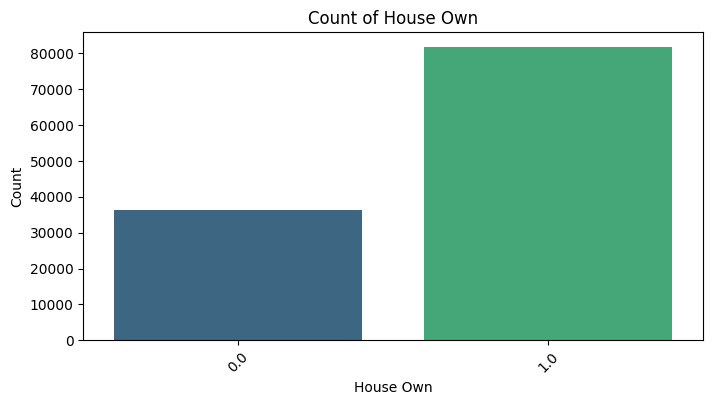

In [ ]:
# House_Own column analysis
print(df['House_Own'].value_counts())

# graphical representation of the 'House_Own' column
plt.figure(figsize=(8, 4))
sns.countplot(x='House_Own', data=df, palette='viridis')
plt.title('Count of House Own')
plt.xlabel('House Own')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Child_Count
0.0     82834
1.0     23431
2.0     10294
3.0      1430
4.0       167
5.0        34
6.0        12
7.0         4
14.0        4
10.0        3
8.0         2
19.0        1
12.0        1
9.0         1
Name: count, dtype: int64


/var/folders/1s/22z8y_nn49n_q5dpmnq5vpw00000gn/T/ipykernel_21490/3793232755.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Child_Count', data=df, palette='viridis')


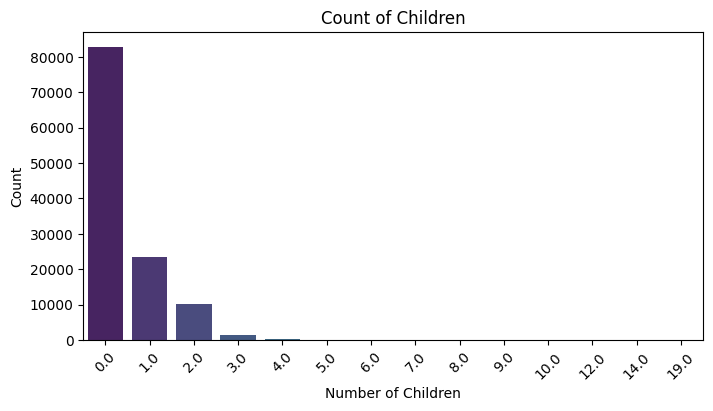

In [ ]:
# Child_Count column analysis
print(df['Child_Count'].value_counts())

# graphical representation of the 'Child_Count' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Child_Count', data=df, palette='viridis')
plt.title('Count of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Accompany_Client
Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
##             12
Name: count, dtype: int64


/var/folders/1s/22z8y_nn49n_q5dpmnq5vpw00000gn/T/ipykernel_21490/887196836.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accompany_Client', data=df, palette='viridis')


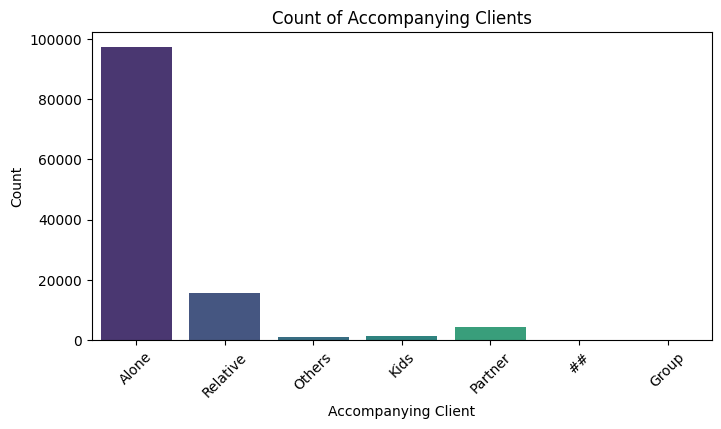

In [ ]:
# Accompany_Client column analysis
print(df['Accompany_Client'].value_counts())

# graphical representation of the 'Accompany_Client' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Accompany_Client', data=df, palette='viridis')
plt.title('Count of Accompanying Clients')
plt.xlabel('Accompanying Client')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Client_Income_Type
Service            61028
Commercial         27764
Retired            21043
Govt Job            8303
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: count, dtype: int64


/var/folders/1s/22z8y_nn49n_q5dpmnq5vpw00000gn/T/ipykernel_21490/1247441396.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Client_Income_Type', data=df, palette='viridis')


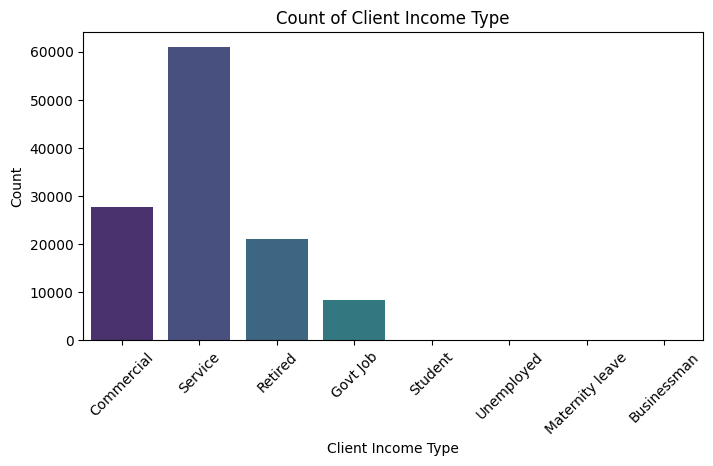

In [69]:
# Client_Income_Type column analysis
print(df['Client_Income_Type'].value_counts())
# graphical representation of the 'Client_Income_Type' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Client_Income_Type', data=df, palette='viridis')
plt.title('Count of Client Income Type')
plt.xlabel('Client Income Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()